#### S&P500 & Weather on trading day (NOAA)

In [245]:
import requests
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from pprint import pprint
import datetime as dt
style.use('ggplot')

#### Get NOAA NYC Central Park Weather 1980 from csv

In [246]:
df1 = pd.read_csv('nyccentralpark2519693.csv')
df1 = df1.dropna(axis=1)
df1.set_index('DATE', inplace=True)
df1.head(2)

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
1980-01-01,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,0.0,7.2,1.1
1980-01-02,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,0.0,5.6,1.1


#### Get S&P 500 Data from Yahoo

In [247]:
start = dt.datetime(1980, 1, 1)
end = dt.datetime.now()
stock = "PFE"
df2 = web.DataReader(stock, 'yahoo', start, end)
df2.reset_index(inplace=True)
df2.set_index("Date", inplace=True)
df2.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-01-02,0.768402,0.741224,0.768402,0.741224,3389664.0,0.212497
1980-01-03,0.748636,0.731341,0.741224,0.741224,3000106.0,0.212497


#### Prep dataframes for merging

In [248]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
df1['DATE']= pd.to_datetime(df1['DATE'])
df1 = df1.set_index('DATE')
df2 = df2.set_index('Date')

In [249]:
df1.head(3)

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
1980-01-01,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,0.0,7.2,1.1
1980-01-02,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,0.0,5.6,1.1
1980-01-03,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,0.0,3.3,-2.2


In [250]:
df2.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-01-02,0.768402,0.741224,0.768402,0.741224,3389664.0,0.212497
1980-01-03,0.748636,0.731341,0.741224,0.741224,3000106.0,0.212497
1980-01-04,0.768402,0.748636,0.748636,0.768402,3495907.0,0.220289


#### Merge dataframes

In [251]:
df = pd.merge(df2, df1, left_index=True, right_index=True)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,STATION,NAME,PRCP,SNOW,TMAX,TMIN
1980-01-02,0.768402,0.741224,0.768402,0.741224,3389664.0,0.212497,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,0.0,5.6,1.1
1980-01-03,0.748636,0.731341,0.741224,0.741224,3000106.0,0.212497,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,0.0,3.3,-2.2
1980-01-04,0.768402,0.748636,0.748636,0.768402,3495907.0,0.220289,USW00094728,"NY CITY CENTRAL PARK, NY US",0.0,0.0,-1.1,-6.1


#### Clean dataframe a bit and create a few new columns

In [252]:
df = df.drop(['STATION', 'NAME'] , axis=1)

In [253]:
df['TAVRG'] = (df['TMAX'] + df['TMIN'])/2
df['TVAR'] = df['TMAX'] - df['TMIN']
df['TAVRGDIF'] = df['TAVRG'].diff()
df['difHigh'] = df['High'].diff()

In [254]:
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,PRCP,SNOW,TMAX,TMIN,TAVRG,TVAR,TAVRGDIF,difHigh
1980-01-02,0.768402,0.741224,0.768402,0.741224,3389664.0,0.212497,0.0,0.0,5.6,1.1,3.35,4.5,NaN,NaN
1980-01-03,0.748636,0.731341,0.741224,0.741224,3000106.0,0.212497,0.0,0.0,3.3,-2.2,0.55,5.5,-2.80,-0.019766
1980-01-04,0.768402,0.748636,0.748636,0.768402,3495907.0,0.220289,0.0,0.0,-1.1,-6.1,-3.60,5.0,-4.15,0.019766


#### Plot average temperature difference over daily high difference

<AxesSubplot:xlabel='TAVRGDIF'>

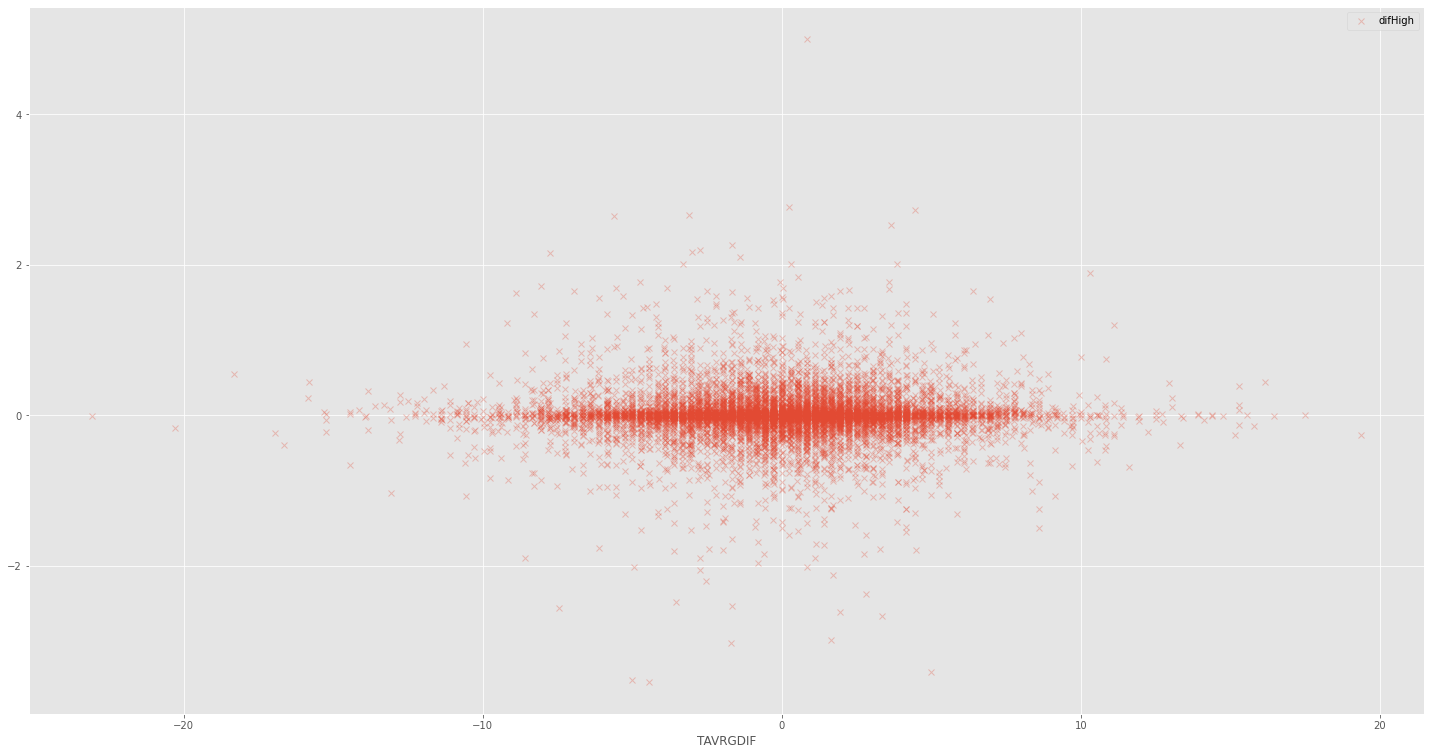

In [255]:
df.plot(x='TAVRGDIF', y='difHigh', style='x', alpha = 0.3, figsize=(25,13))